# Haven explored the house of rep dataset, we move to explore senetorial campaigns

In [2]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#import data
S_df = pd.read_csv('../data_secgrp/S_df.csv')
S_df.head()

,can_id,can_nam,can_off,can_off_sta,can_off_dis,can_par_aff,can_inc_cha_ope_sea,can_str1,can_cit,can_sta,...,cas_on_han_beg_of_per,cas_on_han_clo_of_per,net_con,net_ope_exp,deb_owe_by_com,cov_sta_dat,cov_end_dat,winner,votes,campaign_duration
0,S6IL00292,"DUCKWORTH, L TAMMY",S,IL,0.0,DEM,CHALLENGER,PO BOX 10793,CHICAGO,IL,...,NaN,"$2,520,008.00",13059804.0,"$12,412,571.00",NaN,2015-03-30,2016-10-19,Y,NaN,569
1,S6NH00091,"HASSAN, MARGARET WOOD",S,NH,0.0,DEM,CHALLENGER,PO BOX 298,CONCORD,NH,...,NaN,"$1,805,530.00",14006424.0,"$13,622,825.00",NaN,2015-10-05,2016-10-19,Y,NaN,380
2,S6CO00309,"GRAHAM, JOHN COLLINS",S,CO,0.0,REP,CHALLENGER,PO BOX 101177,DENVER,CO,...,NaN,NaN,483847.0,"$2,358,939.00",NaN,2016-01-01,2016-12-31,N,NaN,365
3,S0KS00166,"WIESNER, PATRICK",S,KS,0.0,DEM,CHALLENGER,2717 ANN COURT,LAWRENCE,KS,...,"$2,653.00","$8,070.00",15026.0,"$29,603.00","$20,000.00",2015-01-01,2016-10-28,N,NaN,666
4,S6OR05085,"STINE, KEVIN",S,OR,0.0,DEM,CHALLENGER,PO BOX 1209,MEDFORD,OR,...,NaN,NaN,5735.0,"$6,436.00",$702.00,2015-09-01,2016-10-25,N,NaN,420


**Insights**
* **Article I, section 3 of the USA Constitution states that** 
* The Senate of the United States shall be composed of two Senators from each State, chosen by the Legislature thereof, for six Years; and each Senator shall have one Vote. Immediately after they shall be assembled in Consequence of the first Election, they shall be divided as equally as may be into three Classes.

**Focus**
* our aim is to check for a relationship in the finance and voting tournout so we proceed in line
* by research the voters column of the dataframe should be empty as the election is not open to public voting

**inference**
* check to ascertain second focus

In [5]:
prf1 = S_df['votes'].isna().count()
prf2 =  len(S_df['votes'])

print(prf1)
print(prf2)

227
227


**Observation**
* research holds so we proceed to drop the votes feature in our dataframe


In [6]:
S_df.drop(columns='votes', inplace=True)

In [7]:
S_df.head()

,can_id,can_nam,can_off,can_off_sta,can_off_dis,can_par_aff,can_inc_cha_ope_sea,can_str1,can_cit,can_sta,...,tot_dis,cas_on_han_beg_of_per,cas_on_han_clo_of_per,net_con,net_ope_exp,deb_owe_by_com,cov_sta_dat,cov_end_dat,winner,campaign_duration
0,S6IL00292,"DUCKWORTH, L TAMMY",S,IL,0.0,DEM,CHALLENGER,PO BOX 10793,CHICAGO,IL,...,"$12,991,223.00",NaN,"$2,520,008.00",13059804.0,"$12,412,571.00",NaN,2015-03-30,2016-10-19,Y,569
1,S6NH00091,"HASSAN, MARGARET WOOD",S,NH,0.0,DEM,CHALLENGER,PO BOX 298,CONCORD,NH,...,"$13,720,969.00",NaN,"$1,805,530.00",14006424.0,"$13,622,825.00",NaN,2015-10-05,2016-10-19,Y,380
2,S6CO00309,"GRAHAM, JOHN COLLINS",S,CO,0.0,REP,CHALLENGER,PO BOX 101177,DENVER,CO,...,"$2,365,130.00",NaN,NaN,483847.0,"$2,358,939.00",NaN,2016-01-01,2016-12-31,N,365
3,S0KS00166,"WIESNER, PATRICK",S,KS,0.0,DEM,CHALLENGER,2717 ANN COURT,LAWRENCE,KS,...,"$29,603.00","$2,653.00","$8,070.00",15026.0,"$29,603.00","$20,000.00",2015-01-01,2016-10-28,N,666
4,S6OR05085,"STINE, KEVIN",S,OR,0.0,DEM,CHALLENGER,PO BOX 1209,MEDFORD,OR,...,"$8,733.00",NaN,NaN,5735.0,"$6,436.00",$702.00,2015-09-01,2016-10-25,N,420


In [8]:
#first, we check amount spent per state 
Amt_per_sta_ds = S_df.groupby(['can_off_sta', 'can_off_dis'])['net_con'].sum().to_frame(name = "total_dis_sum").reset_index()

In [9]:
Amt_per_sta_ds.head()

,can_off_sta,can_off_dis,total_dis_sum
0,AK,0.0,4939859.00
1,AL,0.0,3931229.00
2,AR,0.0,5474189.00
3,AZ,0.0,19341217.00
4,CA,0.0,17797460.72


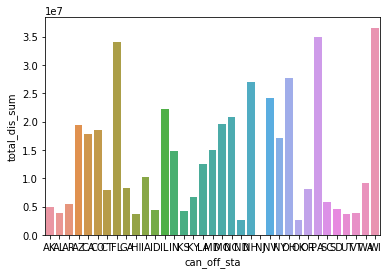

In [12]:
#visualize to see the highest spending state

plt.Figure(figsize=(20,10))
ax = sns.barplot(x='can_off_sta', y='total_dis_sum', data=Amt_per_sta_ds)

**Obeservation**
* three states show high total money spent which are **FL, PA and WI**
* analyze the winners of these three states to observe trends

In [14]:
#create the three dataframes
fl_comp = S_df.loc[S_df['can_off_sta'] == 'FL']
pa_comp = S_df.loc[S_df['can_off_sta'] == 'PA']
wi_comp = S_df.loc[S_df['can_off_sta'] == 'WI']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

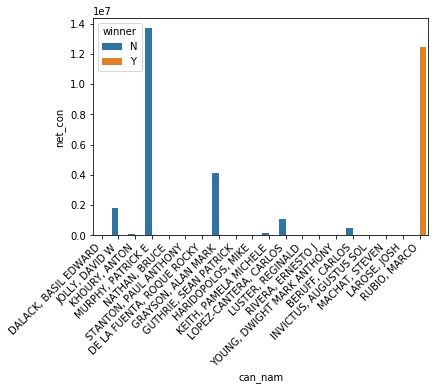

In [15]:
#check winners in FL

ax = sns.barplot(x='can_nam', y='net_con', hue='winner', data=fl_comp)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',  
)

**Observation**
* the highest spender wasn't the winner, to check why this is happening, we inspect with our investment analogy and check how long they have been campaigning for


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

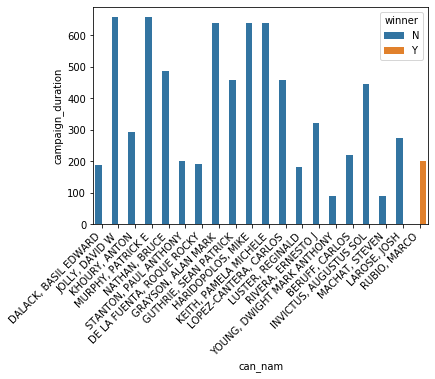

In [16]:
ax = sns.barplot(x='can_nam', y='campaign_duration', hue='winner', data=fl_comp)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',  
)

**Observation**
* we still come short in our investment idealogy, next we check for the number of party affiliation in the respective district

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

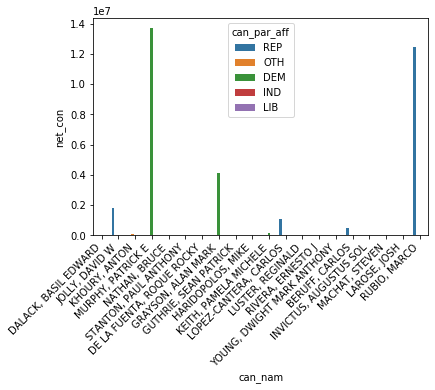

In [17]:
ax = sns.barplot(x='can_nam', y='net_con', hue='can_par_aff', data=fl_comp)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',  
)

**observation**
* we can see a variation in their party affiliations , lets check if they are from the majority or minority party for that state


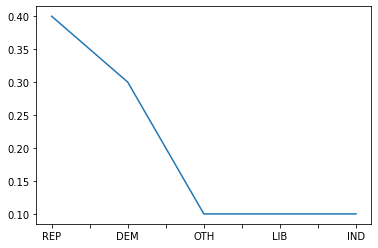

In [19]:
fl_comp['can_par_aff'].value_counts(normalize=True, sort=True).plot()

**Observation**
* we have our inlier insight as we can see, the party affiliation plays a big role in the voting outcome

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

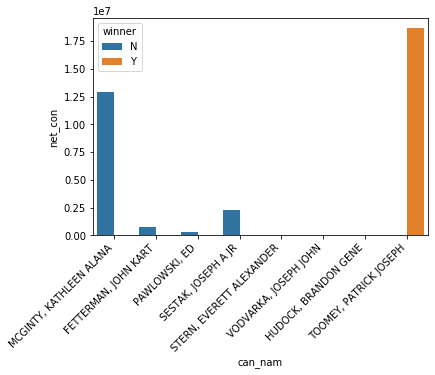

In [21]:
#check winners in PA

ax = sns.barplot(x='can_nam', y='net_con', hue='winner', data=pa_comp)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',  
)

* here we can see that right off the box, the candidate with the highest contribution won the election, we will test the other assumption of investment time and party affiliation next


Text(0.5, 1.0, 'dominant party')

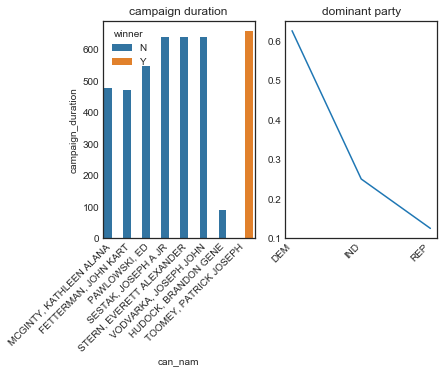

In [22]:

plt.style.use('seaborn-white')
plt.subplot(121)
ax = sns.barplot(x='can_nam', y='campaign_duration', hue='winner', data=pa_comp)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',  
)
plt.title("campaign duration")


plt.subplot(122)
pa_comp['can_par_aff'].value_counts(normalize=True, sort=True).plot()
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',  
)
plt.title("dominant party")




Text(0.5, 1.0, 'campaign duration')

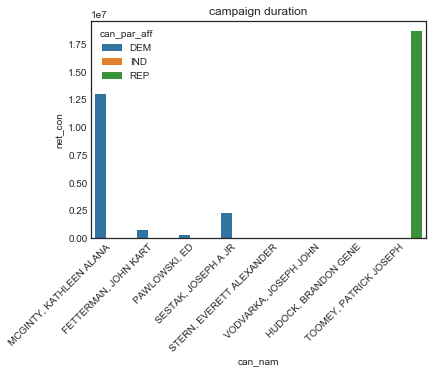

In [23]:

ax = sns.barplot(x='can_nam', y='net_con', hue='can_par_aff', data=pa_comp)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',  
)
plt.title("campaign duration")


**Inference**
* assumption fails. this can be a function of the coefficient of that variable 

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

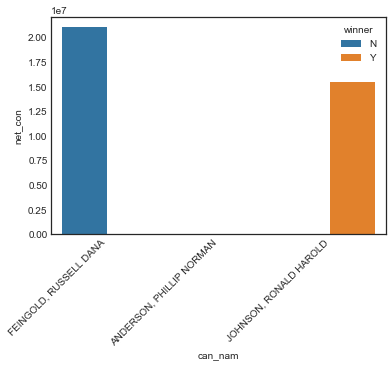

In [24]:
#check winners in wi

ax = sns.barplot(x='can_nam', y='net_con', hue='winner', data=wi_comp)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',  
)

**Observation**
* breaks our first assumption, as we can see
* test investment and party assumption

Text(0.5, 1.0, 'dominant party')

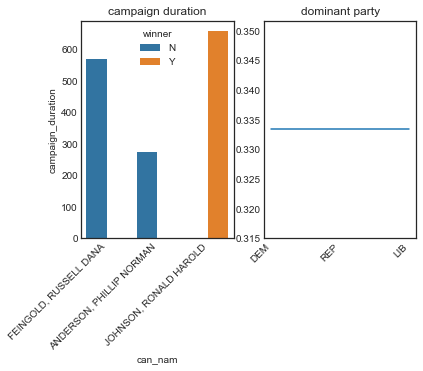

In [25]:
plt.style.use('seaborn-white')
plt.subplot(121)
ax = sns.barplot(x='can_nam', y='campaign_duration', hue='winner', data=wi_comp)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',  
)
plt.title("campaign duration")


plt.subplot(122)
wi_comp['can_par_aff'].value_counts(normalize=True, sort=True).plot()
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',  
)
plt.title("dominant party")


Text(0.5, 1.0, 'campaign duration')

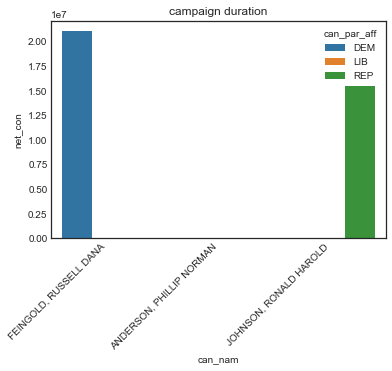

In [26]:
ax = sns.barplot(x='can_nam', y='net_con', hue='can_par_aff', data=wi_comp)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',  
)
plt.title("campaign duration")